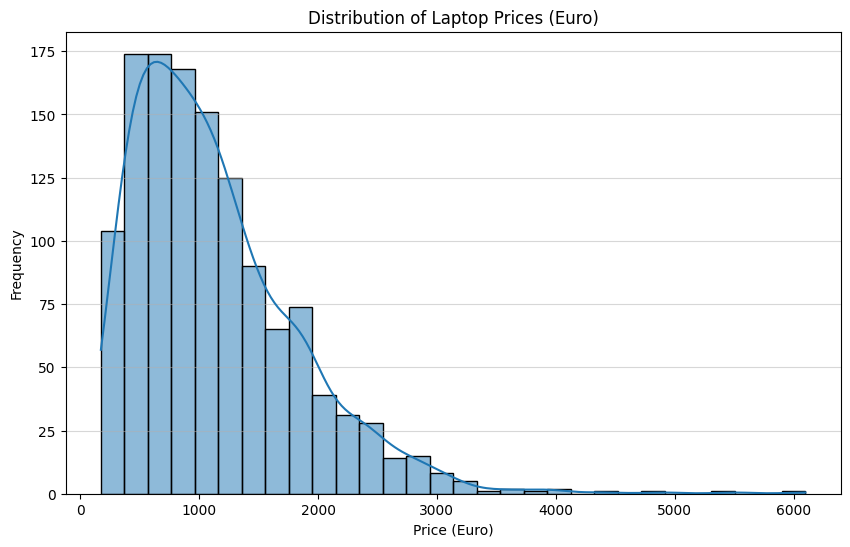

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from matplotlib.ticker import MaxNLocator

# Load the dataset
filename = 'laptop_price.csv'
# Using encoding='latin-1' to handle potential special characters often found in this dataset
df = pd.read_csv(filename, encoding='latin-1')

# Task 1: Plot the price of all laptops (Distribution)
plt.figure(figsize=(10, 6))
sns.histplot(df['Price (Euro)'], kde=True, bins=30)
plt.title('Distribution of Laptop Prices (Euro)')
plt.xlabel('Price (Euro)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [17]:
#Task 2

#Calculate the average price for each company
# We group by 'Company', take the 'Price (Euro)' column, calculate mean(), and sort it.
avg_price_per_company = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)

#Extract the company with the highest average price
most_expensive_company = avg_price_per_company.idxmax()
highest_price = avg_price_per_company.max()

print(f"The company with the highest average price is: {most_expensive_company} ({highest_price:.2f} Euro)")

print("\nAverage laptop price for each company (High to Low):")
print(avg_price_per_company)

The company with the highest average price is: Razer (3346.14 Euro)

Average laptop price for each company (High to Low):
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64


In [18]:

#Task 3
# Print the unique operating systems present in the data before modification
print("Operating systems before cleaning:")
print(df['OpSys'].unique())

# Function to unify operating system names
def categorize_os(inp):
    if 'Windows' in inp:
        return 'Windows'
    elif 'Mac' in inp or 'macOS' in inp:
        return 'Mac'
    else:
        return inp

# Apply the function to the 'OpSys' column
df['OpSys'] = df['OpSys'].apply(categorize_os)

# Print the unique operating systems after modification to verify the result
print("\nOperating systems after cleaning:")
print(df['OpSys'].unique())

Operating systems before cleaning:
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']

Operating systems after cleaning:
['Mac' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


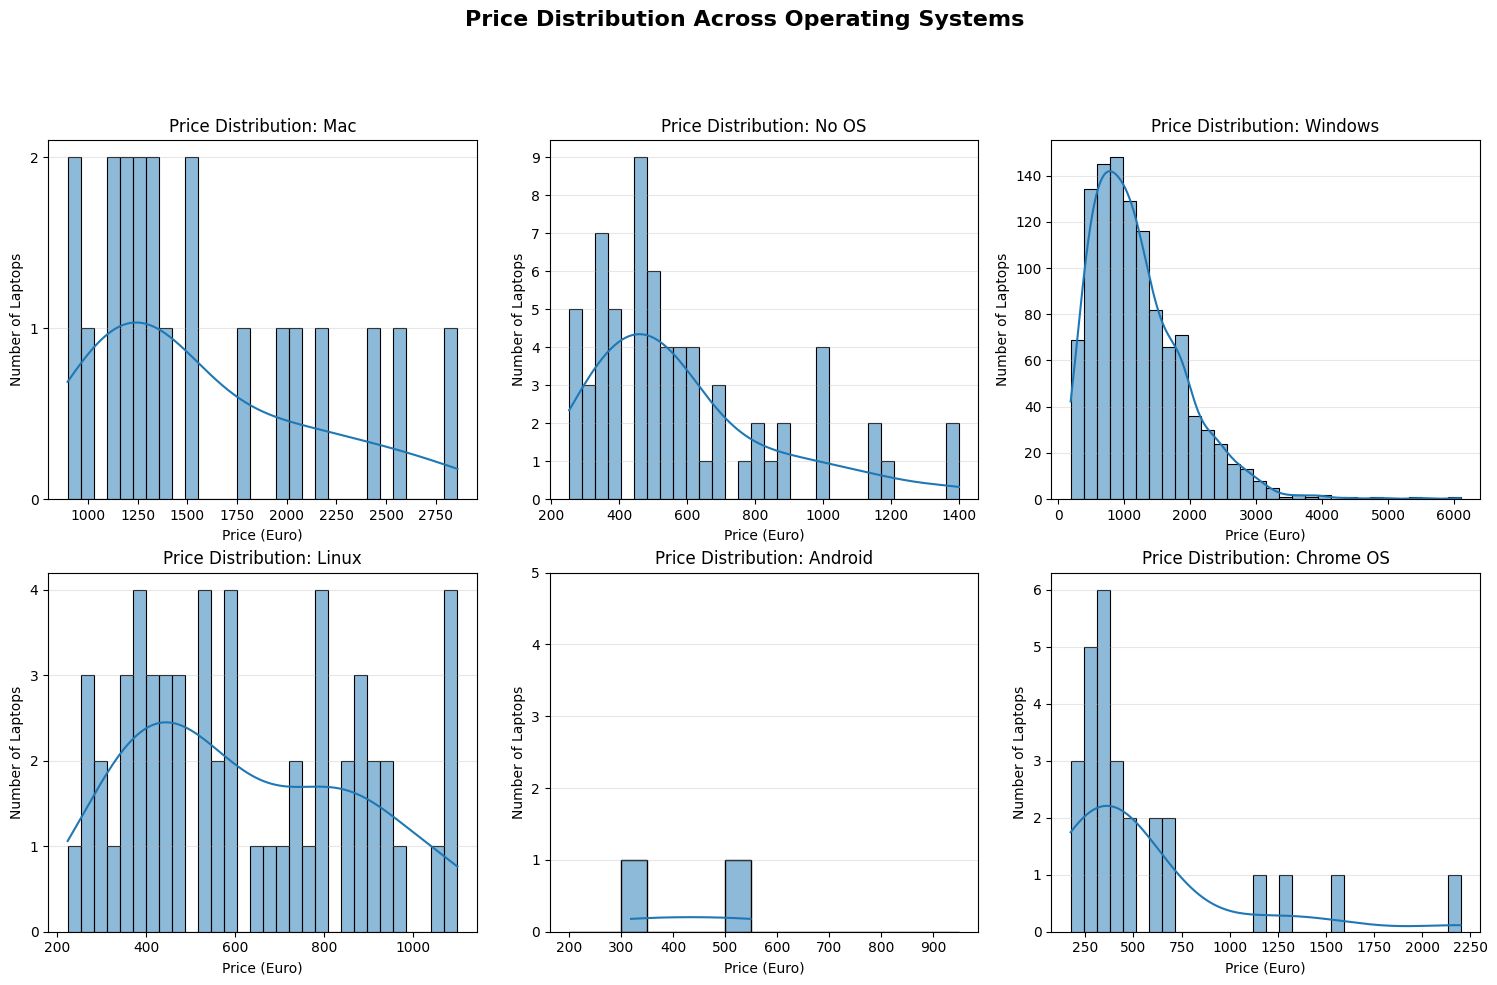

In [ ]:
# Task 4
# Plot price distribution for each Operating System

# Get unique OS list
unique_os = df['OpSys'].unique()
num_os = len(unique_os)

# Calculate layout
cols = 3
rows = math.ceil(num_os / cols)

plt.figure(figsize=(15, 5 * rows))
plt.suptitle('Price Distribution Across Operating Systems', fontsize=16, weight='bold')

for i, os_name in enumerate(unique_os):
    ax = plt.subplot(rows, cols, i + 1)
    
    subset = df[df['OpSys'] == os_name]
    
    # Special logic for Android
    if os_name == 'Android':
        # Use manual bins to separate the few data points available
        bins = np.arange(200, 1000, 50)
        sns.histplot(subset['Price (Euro)'], kde=True, bins=bins, edgecolor='black')
        # Set Y-axis limit to make the small bars visible relative to the plot
        plt.ylim(0, 5)
    else:
        # Standard plot for other operating systems (bins=30)
        sns.histplot(subset['Price (Euro)'], kde=True, bins=30, edgecolor='black', linewidth=0.8)
    
    # Force Y-axis to show only integers
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.title(f'Price Distribution: {os_name}')
    plt.xlabel('Price (Euro)')
    plt.ylabel('Number of Laptops')
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

Original dataset size: 1275
Clean dataset size: 1247
Removed 28 outliers.
------------------------------
Correlation: 0.71


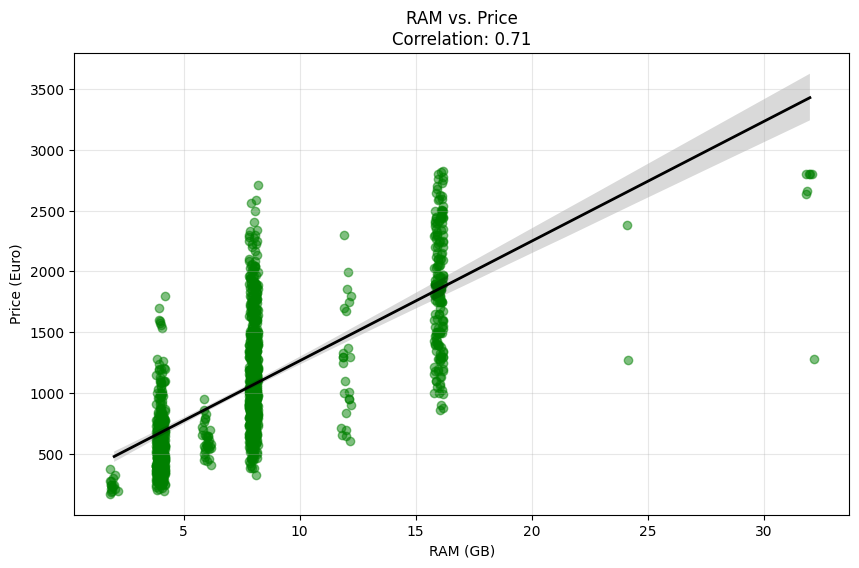

In [20]:
#Task 5
#Detect and Filter Outliers

# Calculate Q1, Q3, and IQR based on Price
Q1 = df['Price (Euro)'].quantile(0.25)
Q3 = df['Price (Euro)'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without the outliers
df_clean = df[(df['Price (Euro)'] >= lower_bound) & (df['Price (Euro)'] <= upper_bound)]

# Print info about the filtering
print(f"Original dataset size: {len(df)}")
print(f"Clean dataset size: {len(df_clean)}")
print(f"Removed {len(df) - len(df_clean)} outliers.")

# Analyze Relationship on Clean Data

# Calculate correlation on the filtered data
clean_corr = df_clean['RAM (GB)'].corr(df_clean['Price (Euro)'])
print("-" * 30)
print(f"Correlation: {clean_corr:.2f}")

#Plotting

plt.figure(figsize=(10, 6))

# Plotting using 'df_clean' instead of 'df'
sns.regplot(
    x='RAM (GB)', 
    y='Price (Euro)', 
    data=df_clean,  # <--- Using the filtered data
    x_jitter=0.2,   # Adds slight spread to see overlapping points
    scatter_kws={'alpha': 0.5, 'color': 'green'}, # Changed color to green to differentiate
    line_kws={'color': 'black', 'linewidth': 2}
)

plt.title(f'RAM vs. Price\nCorrelation: {clean_corr:.2f}')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.grid(True, alpha=0.3)

plt.show()

In [21]:
#Task 6
def extract_storage_simple(memory_text):
    # Split the string if there are multiple drives
    drives = memory_text.split('+')
    
    clean_types = []
    
    for drive in drives:
        # Remove empty spaces from start and end
        drive = drive.strip()
        
        # Split the text into words
        words = drive.split(' ')
        
        # Skip the first word (the capacity) and keep the rest (the type)
        type_only = ' '.join(words[1:])
        
        clean_types.append(type_only)
    
    # Join back together with a plus sign
    return ' + '.join(clean_types)
# Create the new column using the function
df['Storage type'] = df['Memory'].apply(extract_storage_simple)

# Print the first few rows to check the result
print("--- Check Storage Type Column ---")
print(df[['Memory', 'Storage type']].head())

--- Check Storage Type Column ---
                Memory   Storage type
0            128GB SSD            SSD
1  128GB Flash Storage  Flash Storage
2            256GB SSD            SSD
3            512GB SSD            SSD
4            256GB SSD            SSD
